# Розв'язання нелінійних рівнянь

Варіант 9, Калитюк Дар'я, ФІ-83

 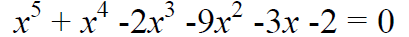
 

In [539]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

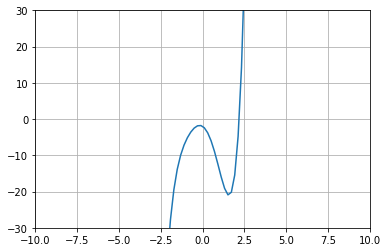

In [540]:
func = lambda x: x**5+x**4-2*x**3-9*x**2-3*x-2
x=np.linspace(-10, 10, 100)
plt.grid()
plt.axis([-10, 10, -30, 30])
plt.plot(x, func(x))

Метод Лагранжа:

In [543]:
a_n=[-2, -3, -9, -2, 1, 1]; n=len(a_n)
F_1=[]; F_2=[]
for i in reversed(range(len(a_n))):
    if a_n[i]>0:
        F_1.insert(n-i, a_n[i])
        F_2.insert(n-i, 0)
    else: 
        F_2.insert(n-i, a_n[i])
        F_1.insert(n-i, 0)

In [542]:
print(np.poly1d(F_1), ' = Ф(x)')
print(np.poly1d(F_2), ' = F(x)')
alpha=1
while func(alpha)<=0:
    alpha=alpha+1
print(f'α={alpha}>0: P(α) = {func(alpha)} > 0, отже ∀ x* < {alpha}')

   5     4
1 x + 1 x  = Ф(x)
    3     2
-2 x - 9 x - 3 x - 2  = F(x)
α=3>0: P(α) = 178 > 0, отже ∀ x* < 3


Теорема про кільце:

In [461]:
A=abs(max(a_n[1:], key=abs))
B=abs(max(a_n[:(len(a_n)-1)], key=abs))
print(f'A = max(|a_i|) (i=0, 1, ..., 4) = {A}\nB = max(|a_i|) (i=1, 2, ..., 5) = {B}')
left=abs(a_n[0])/(B+abs(a_n[0])); rigth=(abs(a_n[len(a_n)-1])+A)/abs(a_n[len(a_n)-1])
print(f'Всі корені лежать у кільці: {left} =< |x*| =< {rigth}')

A = max(|a_i|) (i=0, 1, ..., 4) = 9
B = max(|a_i|) (i=1, 2, ..., 5) = 9
Всі корені лежать у кільці: 0.18181818181818182 =< |x*| =< 10.0


Теорема про верхню межу додатніх коренів:

In [462]:
a_neg=[]
for i in range(len(a_n)):
    if a_n[i]<0: a_neg.append(a_n[i])
B=abs(max(a_neg, key=abs))
print(f'B = max(|a_i|) (a_i<0; i=0, ..., n) = {B}')
def find(a):
    m=None
    for i in reversed(range(len(a))):
        if a[i]<0:
            m=i
            print(f'm = max(i) (a_i<0; i=0, ..., n) = {i}')        
            return m
            break
    if m is None: print('Рівняння не має додатніх коренів.')

R1=1+math.pow((B/a_n[len(a_n)-1]), 1/(len(a_n)-1-find(a_n)))
print(f'R = {R1} - верхня межа додатніх коренів.')

B = max(|a_i|) (a_i<0; i=0, ..., n) = 9
m = max(i) (a_i<0; i=0, ..., n) = 3
R = 4.0 - верхня межа додатніх коренів.


Для знаходження нижньої межі додатніх коренів зробимо заміну x=1/y і отримаємо наступне рівняння:

In [463]:
print(np.poly1d(a_n, variable='y'))
if a_n[0]<0:
    a_nn=[]
    for i in range(len(a_n)):
        a_nn.append((-1*a_n[i]))
    print('Домножимо на -1:\n', np.poly1d(a_nn, variable='y'))
else: a_nn=a_n

    5     4     3     2
-2 y - 3 y - 9 y - 2 y + 1 y + 1
Домножимо на -1:
    5     4     3     2
2 y + 3 y + 9 y + 2 y - 1 y - 1


In [464]:
a_nn.reverse()
print(a_nn)
R=1+math.pow((B/a_nn[len(a_nn)-1]), 1/(len(a_nn)-1-find(a_nn)))
R2=1/R
print(f'R = {R2} - нижня межа додатніх коренів.')

[-1, -1, 2, 9, 3, 2]
m = max(i) (a_i<0; i=0, ..., n) = 1
R = 0.4070873392637155 - нижня межа додатніх коренів.


Для знаходження нижньої межі від'ємних коренів зробимо заміну x=-x і отримаємо наступне рівняння:

In [465]:
a_n.reverse()
for i in range(len(a_n)):
    if i%2==0: a_n[i]=-a_n[i]
print(np.poly1d(a_n))
if a_n[0]<0:
    a_nn=[]
    for i in range(len(a_n)):
        a_nn.append((-1*a_n[i]))
    print('Домножимо на -1:\n', np.poly1d(a_nn))
else: a_nn=a_n

    5     4     3     2
-1 x + 1 x + 2 x - 9 x + 3 x - 2
Домножимо на -1:
    5     4     3     2
1 x - 1 x - 2 x + 9 x - 3 x + 2


In [466]:
a_nn.reverse()
print(a_nn)
R=1+math.pow((B/a_nn[len(a_nn)-1]), 1/(len(a_nn)-1-find(a_nn)))
R3=-1*R
print(f"R = {R3} - нижня межа від'ємних коренів.")


[2, -3, 9, -2, -1, 1]
m = max(i) (a_i<0; i=0, ..., n) = 4
R = -10.0 - нижня межа від'ємних коренів.


Для знаходження верхньої межі від'ємних коренів зробимо заміну x=-1/y і отримаємо наступне рівняння:

In [467]:
print(np.poly1d(a_nn, variable='y'))

   5     4     3     2
2 y - 3 y + 9 y - 2 y - 1 y + 1


In [468]:
a_nn.reverse()
print(a_nn)
R=1+math.pow((B/a_nn[len(a_nn)-1]), 1/(len(a_nn)-1-find(a_nn)))
R4=-1/R
print(f"R = {R4} - верхня межа від'ємних коренів.")

[1, -1, -2, 9, -3, 2]
m = max(i) (a_i<0; i=0, ..., n) = 4
R = -0.18181818181818182 - верхня межа від'ємних коренів.


Теорема Гюа про наявність комплесних коренів:

In [469]:
a_n.reverse()
for i in range(1, len(a_n)-1):
    if a_n[i]**2<a_n[i-1]*a_n[i+1]:
        print(f'Існує таке k, що (a_k)^2<a_(k-1)*a_(k+1), k = {i}: {a_n[i]}^2={pow(a_n[i], 2)}<{a_n[i-1]}*{a_n[i+1]}={a_n[i-1]*a_n[i+1]}, отже рівняння має комплексні корені.')
        break
    if i==len(a_n)-2: 
        print('Рівняння не має комплексних коренів.')    
     

Існує таке k, що (a_k)^2<a_(k-1)*a_(k+1), k = 1: 3^2=9<-2*-9=18, отже рівняння має комплексні корені.


Теорема Штурма:

In [524]:
f=np.poly1d([1, 1, -2, -9, -3, -2])
print(f)
f0=f
f1=np.poly1d([5, 4, -6, -18, -3])
f2=np.polymul(np.polydiv(f0, f1)[1], -1)
f3=np.polymul(np.polydiv(f1, f2)[1], -1)
f4=np.polymul(np.polydiv(f2, f3)[1], -1)
f5=np.polymul(np.polydiv(f3, f4)[1], -1)
mas=[f2, f3, f4, f5]

   5     4     3     2
1 x + 1 x - 2 x - 9 x - 3 x - 2


In [525]:
print('Загальна формула: f_(i+1)=-[f_(i-1) mod f_i]')
print(f0, ' = f0')
print(f1, ' = f1')
print(mas[0], ' = f2')
print(mas[1], ' = f3')
print(mas[2], ' = f4')
print(mas[3], ' = f5')

Загальна формула: f_(i+1)=-[f_(i-1) mod f_i]
   5     4     3     2
1 x + 1 x - 2 x - 9 x - 3 x - 2  = f0
   4     3     2
5 x + 4 x - 6 x - 18 x - 3  = f1
      3        2
0.96 x + 5.16 x + 1.68 x + 1.88  = f2
        2
-108.2 x - 12.24 x - 41.8  = f3
 
-0.7378 x + 0.07127  = f4
 
43.99  = f5


In [526]:
a=max(left, R2)
b=min(alpha, rigth, R1)
c=R4
d=R3
points=[d, c, a, b]
eps=0.00001

In [544]:
df=pd.DataFrame({'f': ['f0', 'f1', 'f2', 'f3', 'f4', 'f5'], f'f({d})':[f'{f0(d)}', f'{f1(d)}', f'{f2(d)}', f'{f3(d)}', f'{f4(d)}', f'{f5(d)}'], f'f({c})':[f'{f0(c)}', f'{f1(c)}', f'{f2(c)}', f'{f3(c)}', f'{f4(c)}', f'{f5(c)}'], f'f({a})':[f'{f0(a)}', f'{f1(a)}', f'{f2(a)}', f'{f3(a)}', f'{f4(a)}', f'{f5(a)}'], f'f({b})':[f'{f0(b)}', f'{f1(b)}', f'{f2(b)}', f'{f3(b)}', f'{f4(b)}', f'{f5(b)}']})
df.set_index('f')

,f(-10.0),f(-0.18181818181818182),f(0.4070873392637155),f(3)
f,,,,
f0,-88872.0,-1.739150952182849,-4.809024990821792,178
f1,45577.0,0.055802199303326194,-10.9147267355964,402
f2,-458.9199999999998,1.7393538692712247,3.4837865082810398,79.27999999999999
f3,-10739.713541666675,-43.148459022038594,-64.71088730173072,-1052.343750000001
f4,7.448975311377266,0.20540605523493327,-0.22907132624742255,-2.1420469444408226
f5,43.98879739757292,43.98879739757292,43.98879739757292,43.98879739757292


In [528]:
def count(num):
    k=0
    for i in range(len(df[f'f({num})'])-1):
        if (float(df[f'f({num})'][i])>0 and float(df[f'f({num})'][i+1])<0) or (float(df[f'f({num})'][i])<0 and float(df[f'f({num})'][i+1])>0):
            k=k+1
    return k

In [532]:
for i in points:
    print(f'ККЗ у точці {i}: ', count(i))
for i in range(len(points)-1):
    print(f'Кількість коренів на проміжку [{points[i]}, {points[i+1]}] = ', count(points[i])-count(points[i+1]))
    if count(points[i])-count(points[i+1])>0:
        a=points[i]
        b=points[i+1]
print(f'a = {a}\nb = {b}')

ККЗ у точці -10.0:  3
ККЗ у точці -0.18181818181818182:  3
ККЗ у точці 0.4070873392637155:  3
ККЗ у точці 3:  2
Кількість коренів на проміжку [-10.0, -0.18181818181818182] =  0
Кількість коренів на проміжку [-0.18181818181818182, 0.4070873392637155] =  0
Кількість коренів на проміжку [0.4070873392637155, 3] =  1
a = 0.4070873392637155
b = 3


In [533]:
def bisection(x, y):
    z=(x+y)/2
    i=0
    while abs(x-y)>eps:
        i=i+1
        z=(x+y)/2
        if func(x)*func(z)<=0: 
            y=z
        else: 
            x=z
        print(f'{i}) a = {x}, b = {y}')
    return (x+y)/2

x_bisection=bisection(a, b)
print(f'Метод бісекції:\nКорінь рівняння з проміжку [{a}, {b}] дорівнює: ', x_bisection)

Метод бісекції:
1) a = 1.7035436696318578, b = 3
2) a = 1.7035436696318578, b = 2.3517718348159287
3) a = 2.0276577522238934, b = 2.3517718348159287
4) a = 2.0276577522238934, b = 2.189714793519911
5) a = 2.1086862728719025, b = 2.189714793519911
6) a = 2.1492005331959065, b = 2.189714793519911
7) a = 2.1694576633579086, b = 2.189714793519911
8) a = 2.17958622843891, b = 2.189714793519911
9) a = 2.17958622843891, b = 2.1846505109794103
10) a = 2.18211836970916, b = 2.1846505109794103
11) a = 2.18211836970916, b = 2.1833844403442852
12) a = 2.18211836970916, b = 2.182751405026723
13) a = 2.1824348873679416, b = 2.182751405026723
14) a = 2.1824348873679416, b = 2.1825931461973322
15) a = 2.1824348873679416, b = 2.182514016782637
16) a = 2.1824744520752892, b = 2.182514016782637
17) a = 2.182494234428963, b = 2.182514016782637
18) a = 2.1825041256058, b = 2.182514016782637
Корінь рівняння з проміжку [0.4070873392637155, 3] дорівнює:  2.1825090711942186


In [534]:
def horda(x, y):
    i=0
    z=(x*func(y)-y*func(x))/(func(y)-func(x))
    while abs(func(z))>eps:
        i=i+1
        z=(x*func(y)-y*func(x))/(func(y)-func(x))
        if func(x)*func(z)<=0: 
            y=z
        else: 
            x=z 
        print(f'{i}) a = {x}, b = {y}')
    return (x*func(y)-y*func(x))/(func(y)-func(x))

x_horda=horda(a, b)
print(f'Метод хорд:\nКорінь рівняння з проміжку [{a}, {b}] дорівнює: ', x_horda) 

Метод хорд:
1) a = 0.4752972199582001, b = 3
2) a = 0.5522836002355226, b = 3
3) a = 0.639726430646652, b = 3
4) a = 0.7394377248494178, b = 3
5) a = 0.8531463608359839, b = 3
6) a = 0.9820497443810531, b = 3
7) a = 1.1260359018937363, b = 3
8) a = 1.2826008609565116, b = 3
9) a = 1.4458404221476282, b = 3
10) a = 1.6064032515503877, b = 3
11) a = 1.7533304711502244, b = 3
12) a = 1.8774833100158472, b = 3
13) a = 1.9745002191428682, b = 3
14) a = 2.0452797336991253, b = 3
15) a = 2.0941682136416864, b = 3
16) a = 2.126603876974638, b = 3
17) a = 2.147531667151304, b = 3
18) a = 2.160786580183064, b = 3
19) a = 2.169081975149902, b = 3
20) a = 2.174234357534234, b = 3
21) a = 2.17741944097365, b = 3
22) a = 2.1793825988071815, b = 3
23) a = 2.1805904110855776, b = 3
24) a = 2.181332672096211, b = 3
25) a = 2.1817885139884807, b = 3
26) a = 2.1820683397480414, b = 3
27) a = 2.18224007049951, b = 3
28) a = 2.1823454458508, b = 3
29) a = 2.182410098660152, b = 3
30) a = 2.1824497638582088

In [537]:
d_func=lambda x: 5*x**4+4*x**3-6*x**2-18*x-3
def newton(x, y):
    i=0
    x0=(x+y)/2
    x1=x0-func(x0)/d_func(x0)
    while(abs(func(x1))>eps):
        i=i+1
        print(f'{i}) a = {x0}, b = {x1}')
        x0=(x1+x0)/2
        x1=x0-func(x0)/d_func(x0)
    return x1

print('Метод Ньютона:')
x_newton=newton(a, b)
print(f'Корінь рівняння з проміжку [{a}, {b}] дорівнює: ', x_newton)  

Метод Ньютона:
1) a = 1.7035436696318578, b = 3.586050797024418
2) a = 2.6447972333281378, b = 2.3420252284778047
3) a = 2.4934112309029715, b = 2.266519842013776
4) a = 2.379965536458374, b = 2.2211591714375407
5) a = 2.3005623539479574, b = 2.1978334546325637
6) a = 2.2491979042902606, b = 2.1877728094176767
7) a = 2.218485356853969, b = 2.184116180779494
8) a = 2.2013007688167314, b = 2.182962075870115
9) a = 2.192131422343423, b = 2.1826322394080044
10) a = 2.187381830875714, b = 2.182543582618445
11) a = 2.184962706747079, b = 2.182520563561124
12) a = 2.1837416351541012, b = 2.1825146963143034
13) a = 2.1831281657342023, b = 2.1825132150688673
14) a = 2.1828206904015346, b = 2.1825128429292238
Корінь рівняння з проміжку [0.4070873392637155, 3] дорівнює:  2.1825127496642494


In [538]:
res_b=func(x_bisection)
res_h=func(x_horda)
res_n=func(x_newton)
print(f'Бісекція: f({x_bisection}) = {res_b}\nХорди: f({x_horda}) = {res_h}\nНьютон: f({x_newton}) = {res_n}')
if min([res_b, res_h, res_n], key=abs)==res_b:
    print(f'Найбільш точне значення отримано методом бісекції.')
elif min([res_b, res_h, res_n], key=abs)==res_h:
    print(f'Найбільш точне значення отримано методом хорд.')
else:
    print(f'Найбільш точне значення отримано методом Ньютона.')

Бісекція: f(2.1825090711942186) = -0.00030698425188724343
Хорди: f(2.182512651236877) = -5.664028165597301e-06
Ньютон: f(2.1825127496642494) = 2.6203147349690425e-06
Найбільш точне значення отримано методом Ньютона.
